# Comp 3125 Indiviudal Project
## Topic: In game economy analysis
We will be looking at some of the trends relating to the specific gamemode Skyblock hosted on the Hypixel servers on Minecraft. 

## Questions 
    1. Which of the games mechanics affect the market the most? 

    For instance, there are in game events, and things like mayors which increase the demand  and supplies of certain items accordingly. 

    2. Does time play a role into the market? 

    Since the servers are international, there may be more or less players, or other factors which can affect the value of currency and specific items 

    3. How does the emergence of new money-making Metas impact the demand and prices of items in the market? 

    For example, there had been an update in this games history which caused a serious level of inflation towards the economy. The ‘best’ item in the game had doubled its price as a result of this money making method. When many people begin doing it, the prices of corresponding items fluctuate greatly. 

    4. How  much do updates affect the market? 

    Along with this to consider is the content of the update and whether or not that plays a role into how the economy fluctuates? 

    5. How does player count affect the market? 

    This follows along with Q4, and Q2, since player count is usually affected heavily by this. 

    6. Is the economy stable? 

    While certain events and items tend to fluctuate the price, one of the primary concern of players is whether or not the economy can be considered “stable”. Fluctuation to a point can be considered stable, so an analysis on how the market may perform in the future will be my conclusion. 


## General Overview of Economy
The games economy is based on a few factors: 
> NPC price or the price in which you can sell to in game people

> The aution house (AH), where high value items can be either auctioned or bought instantly (Similar to eBay). This is a player controlled market.

Previously, this had only auction capabilities, and you had to sell everything that you weren't going to sell to NPCS. This part is hard to analyze since there are far more factors that go into this, and collecting the data is far less straight forward.

> Bazaar (BZ), is another player controlled market, however it deals in goods with high supply / no unique varients. In the case of the AH, there are items which can have either enchantments, buffs, reforges, skins, levels. 

The api provides detailed stats on the Bazaar, and there are a few items in which we can look at that are either affected by specific events or are a commonly values commodity.


## Specific Items


General Items: 
BOOSTER_COOKIE
GREEN_GIFT



By Mayor:
    #TLDR ; every mayor has some items that I imagine are affected, so I will include some of those to get a bigger picture

    Aatrox: REVENANT_FLESH, ENCHANTED_ROTTEN_FLESH, ENCHANTMENT_SMITE_7
    Diana: GRIFFIN_FEATHER, ENCHANTED_GOLD_BLOCK
    Paul: KISMET_FEATHER, GIANT_FRAGMENT_LASER
    Diaz: STOCK_OF_STONKS
    Cole: GLOSSY_GEMSTONE, FLAWLESS_SAPPHIRE_GEM, TITANIUM_ORE
    Finnegan: CONDENSED_FERMENTO, ENCHANTMENT_TURBO_WHEAT_1, WHEAT
    Marina: MAGMA_FISH_SILVER, LAVA_WATER_ORB

Similar Event Items: 
GREEN_GIFT, JERRY_BOX_PURPLE, PURPLE_CANDY

Generally Important Items:
FLAWLESS_JASPER_GEM #there are more but this is good for trends (I already have another gemstone too)
ESSENCE_DRAGON, SOULFLOW, RECOMBOBULATOR_3000

## Process

I will be doing some price analysis, so general plotting
There will be linear regression used to predict behavior and correlation between specific factors (IE playercount)


## Issues 
I had to refresh the API key every so often to keep pulling data, and due to me leaving my computer and or instinctively turning it off, there are times that are not exactly 2 hours in between data pulls.

In [1]:
# These are the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# This is the theme I will be using plyavxspsan
plt.style.use('dark_background')

# Normalization
In the next block I will focus on normalizing the data. 

> The issue with the data as it stands is that both quantity and price are going to be drastically different among the items, such as wheat having ~3000000 listings at a given time, and only costing 2~3 coins, when an item like Booster Cookies having a price of ~11000000 and ~2000 listings.

# Focus
I will be using a zscore normalization.
> This should allow me to do 2 things, one being I can compare the price difference to the mean, and the other being for general comparison. Note: There may still be large gaps so I will keep watch

In [2]:
# Loading data...
fName = '../Skyblock.csv'
sbData_UNCLEANED = pd.read_csv(fName)
sbDF = pd.DataFrame(sbData_UNCLEANED)

#Preprocessing
sbDF["Z-Score Price"] = sbDF.groupby("Product ID")["Average Price Per Unit"].transform(
    lambda x: (x - x.mean()) / x.std() # We create a dummy function to perform the Z-score transformation
)

In [3]:
#Verification (We should see a bunch of z-scores)
print(sbDF)

          Timestamp  Player Count              Product ID  Total Amount  \
0     1731904590760         11559          ESSENCE_DRAGON       42295.0   
1     1731904590760         11559    GIANT_FRAGMENT_LASER        2221.0   
2     1731904590760         11559      CONDENSED_FERMENTO        1028.0   
3     1731904590760         11559  ENCHANTED_ROTTEN_FLESH      360937.0   
4     1731904590760         11559            TITANIUM_ORE      831189.0   
...             ...           ...                     ...           ...   
4123  1733512680268         18131         STOCK_OF_STONKS        2948.0   
4124  1733512680268         18131        JERRY_BOX_PURPLE       13066.0   
4125  1733512680268         18131                   WHEAT     5253481.0   
4126  1733512680268         18131          BOOSTER_COOKIE         292.0   
4127  1733512680268         18131     ENCHANTMENT_SMITE_7         228.0   

      Average Price Per Unit     Mayor  Z-Score Price  
0                    3579.69  Scorpius     

# Question 1 : Which of the games mechanics affect the market the most? 

There are a few options for in game mechanics, namely events and mayors. Now that the data is normalized, we can best represent this

#### Mayors
They're characters that represent buffs for everyone playing the game. They are elected and changed roughly every 4-5 days. 

#### Events
In terms of events there are a few to consider : Carnival, Spooky, Fishing, Jerry's Island, and Jacob's Contest

Fishing can be omitted, as it is more reliant on the mayor elected at the time, Jacob's contest will affect prices by less than 20% (Though I can be proven wrong) coins maximum due to the items reaching equibilrium with its NPC value.

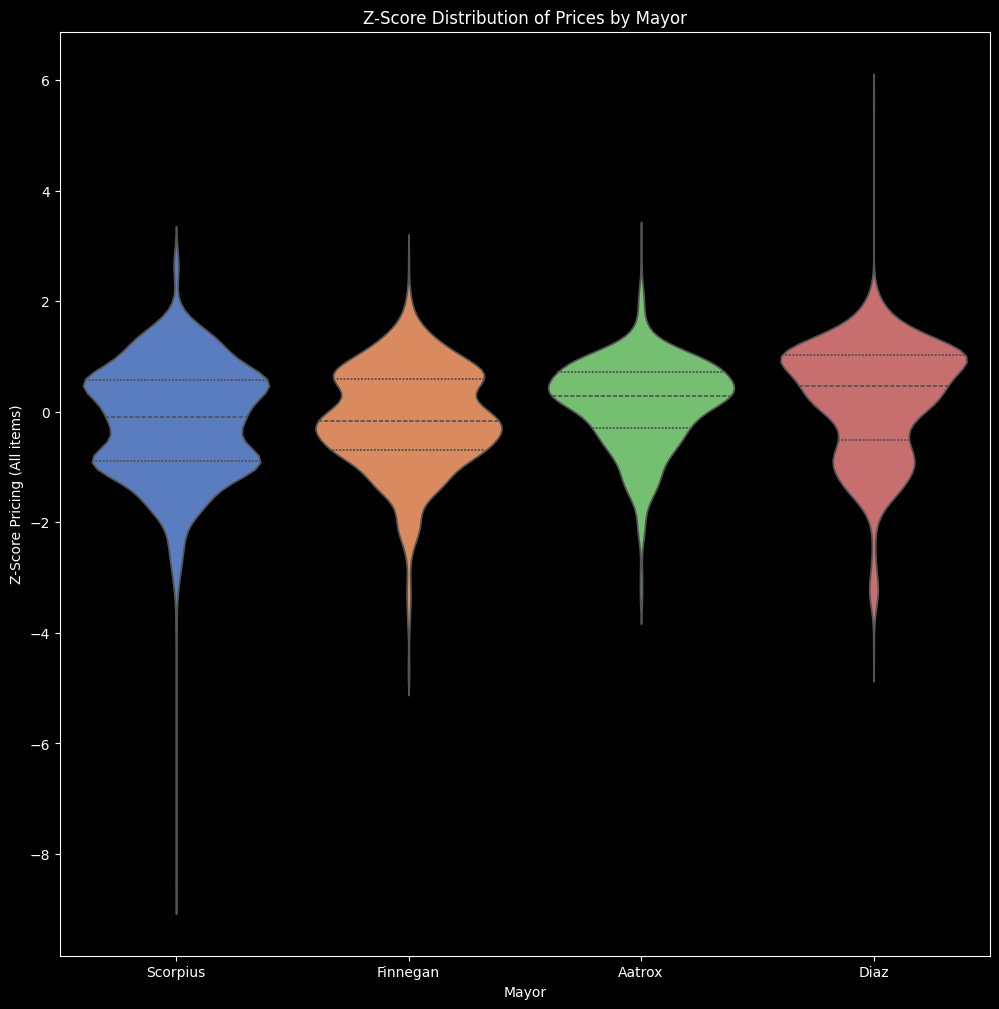

In [4]:
# Here we do a violin plot to see roughly how the overall pricing is doing
plt.figure(figsize=(12, 12))

#Violin plot will show us 3 parameters well, since we can seperate the mayors and show overall performance
sns.violinplot(data=sbDF, x="Mayor", y="Z-Score Price",  hue="Mayor", inner="quartile", density_norm='width', legend = False, palette="muted")

#Plot details
plt.title("Z-Score Distribution of Prices by Mayor")
plt.xlabel("Mayor")
plt.ylabel("Z-Score Pricing (All items)")
plt.show()


### The plot above does not provide enough detail
Due to a recent update Diaz is likely skewed, this is something I will look into later, but above there is no conclusive evidence on how each mayor affects the economy
    > My hypothesis for this is that since each of these mayors in particular affects something, and causes the price to change for something else we have a 'stable economy' which is cool! 
    > Everything changes in supply in demand relatively healthily (Given my small data) if I had more data, I may want to reinvestigate this.


### Specific items and Explainations
Below this we are going to look at specific items, which ideally should give us insight into how to properly invest!
Unfortuntely the data is still going to look complicated, but I will try to explain it

# Observations
In this graph we can see that relatively, they each have benefits and negatives. Scorpius seems to have an extreme cases of price differentials
Diaz seems to have the greatest possible impact (Though this is an outlier) 
Aatrox seems to have a generally positive price impact
Finnegan is roughly neutral

# Explainations
This graph does not really go into depth and is a false positive. Why? Well, while Diaz does generally impact the price of 'Stock of Stonks' and there is no incentive to prefer one method of grinding to another, there happened to be a relatively large update recently.

### Further down
I will be epxloring the specific items along with the mayor. I will not be exploring every single item however, since some of them come down to players progressing in a way that they prefer.
So long as the data is generally normally distributed, I can attest that its more due to player count than anything (Most of the playerbase seems to be NA, however other countries also join!)


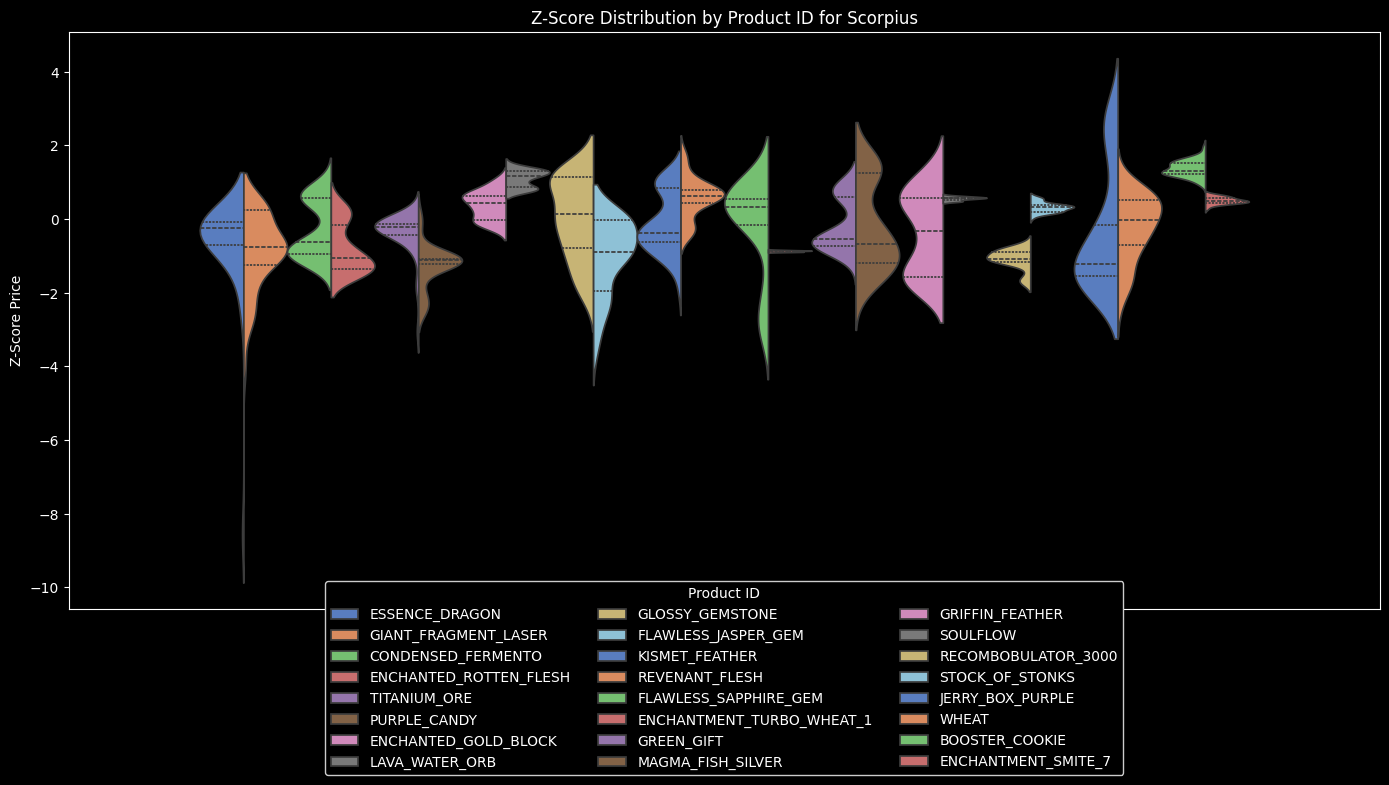

In [5]:
# Grouping, Originally I was going to loop through this, but that is in the deprecated part since I could not get the legend to align properly. I kept this though
mayors = sbDF["Mayor"].unique() 

# Scorpius
mayor = mayors[0]
mayor_data = sbDF[sbDF["Mayor"] == mayor] #Mask for when scorpius is mayor


# Respectable size
fig, ax = plt.subplots(figsize=(14, 8))
    
# Plot the violin plot for each mayor with Product ID as hue (this is an easy way to group)
sns.violinplot(data=mayor_data, x="Mayor", y="Z-Score Price", hue="Product ID",inner="quart", ax=ax, split=True,  palette="muted") 
#I thought these looked nice
ax.set_title(f"Z-Score Distribution by Product ID for {mayor}")
ax.set_xlabel("Mayor")
ax.set_ylabel("Z-Score Price")
    
leg = ax.legend(title='Product ID', loc='center', bbox_to_anchor=(0.5, -.12), ncol=3, framealpha=1) #this really is the largest legend of all time :(


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Explaination
So this code above provides us one of the 4 mayors, and the specific items. Now, we can see if items have large distributions over time and figure out which of the items is most affected by what mayors!
Now the distributions mean a few things, mostly how many times that specific Z-score appears in my data. Higher spikes don't mean higher price, the value represents the price scaling.

# Scorpius
In terms of buffs, scorpius gives every player who voted for them 50k-1M dependent on your in-game level. The other perk he has is 'Darker Auctions' which is an in-game event with high value limited items. This is a 'coin sink', where currency spent is *removed* from the game, in exchange for the item. 

## Specific Observations
    > Purple Jerry boxes seem to be weirdly manipulated, while its possible the price increased (since the specific mayor 'Jerry' who gives out boxes has not been elected in a while) it is odd. They are general use items however, as they give skill experience, though they are mostly for end-game players with too much money (The experience given may not be worth it.) Here is a video exploring this: https://www.youtube.com/watch?v=eXTK30yOsGY 
        * Finnegan is next mayor, who buffs farming experience, potential source for change
        * Since its decreasing, I would assume someone who invested (or a group) is selling at large since overall it should be a 'higher' price due to demand, This rule applies to the green gifts too
    > There are a few items that have 'grown' : Lava water orbs, Soulflow, and booster cookies!

    Booster Cookies: Since these can be considered a 'pay to win' element, it is fair to assume the price increase is due to people buying more.. which seems counterintuitive since supply increases. However, one of the specific abilities of booster cookies is to prevent coin loss on death, so in the case of the dark auction we can conclude that people want to buy cookies in order to prevent them losing their money on the way to the dark auction (Also special mayors may = more players)

    Lava water orbs : Given the recent update, these items are going to go down in price (The items to create them originally were 'soulbound' or account locked, now they can be purchased on the bazaar). During this, since there is a generally low amount of them we can say the supply of this item happened to be going down during this time. 

    Soulflow: If booster cookies are up, that means people are playing the game and trying to get money for the darker auction. So naturally, soulflow, or a source of power in this game ends up getting higher demand.

### Issue
    > There are items in particular that I had forgotten to account for, meaning we may not get a great representation of Scorpius's performance. If I were to give my input, my theory would be that item prices would go down as people try to get funds for scorpius, and eventually stabilize. 


## Conclusion
Scorpius on his own should generally trend item prices down (As the coin sink decreases inflatition)

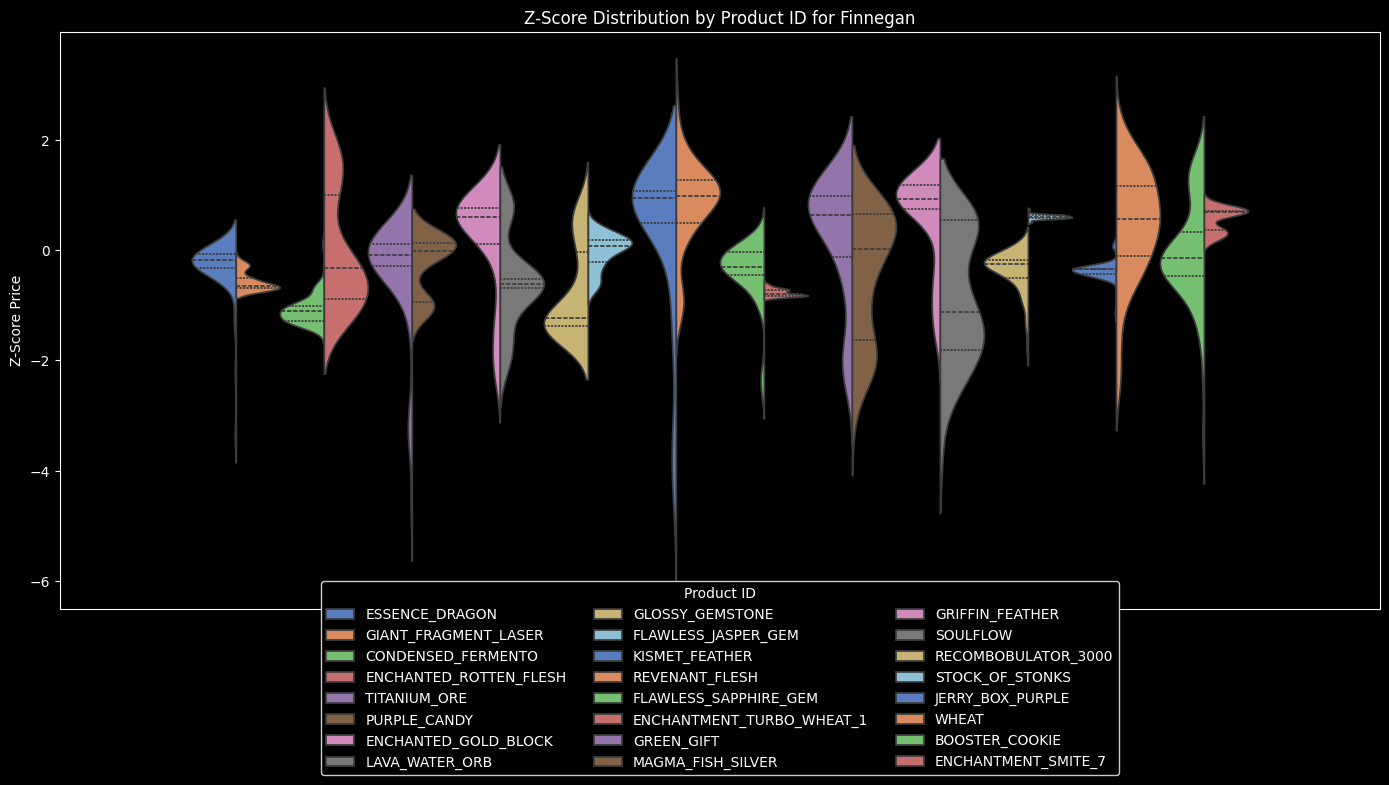

In [6]:
# Finnegan, This is all duplicated code from above
mayor = mayors[1]
mayor_data = sbDF[sbDF["Mayor"] == mayor]


fig, ax = plt.subplots(figsize=(14, 8))

sns.violinplot(data=mayor_data, x="Mayor", y="Z-Score Price", hue="Product ID",inner="quart", ax=ax, split=True,  palette="muted") 
ax.set_title(f"Z-Score Distribution by Product ID for {mayor}")
ax.set_ylabel("Z-Score Price")
   
leg = ax.legend(title='Product ID', loc='center', bbox_to_anchor=(0.5, -.12), ncol=3, framealpha=1)

plt.tight_layout()
plt.show()

# About the mayor
    Finnegan does a few things, he primarily specializes in farming
        > Additional Farming Experience
        > Jacobs Contest buff (Larger brackets, so there is more incentive to farm competitively)
        > Pelt (Another feature, but since this is another currency, there is not much in the way of analyzing this)
        > Pests Buff

    Pests: Currently in skyblock, there is a location called 'The Garden' which is specific to your account. There are upgrades to this, but the important thing is that pests spawn which both give you small rewards (such as farming goods) and can reduce your farming fortune. If you collect them you can trade them in for a buff to 'farming fortune' or an additive multiplier for how many crops are given. 


## Positive Observations
    Finnegan is a farming mayor, the items I predicted to have the most impact would be wheat and fermento
    There are other items I suspected to have similar impact which are Jerry boxes and green gifts, due to one of Finnegans buffs having Farming Experience Buff

    Wheat: Oddly sparatic, people buy a lot of it since its cheap, but also a lot of people quickly sell it. I believe there to be more desire to buy it in case the price goes lower than NPC price.
    Fermento: This item is a rare drop, so when a lot of people are farming there is an increase of supply, so we see the price drop. It likely will increase *just* before finnegan is re-elected (since there is a tendency to capitalize on the buffs for the current moment)


## Negative Observations
    There are 2 things to consider about farming. Since the bazaar price is similar to NPC price, there is often times when we are causing inflation due to the amount of crops being sold to NPCS. The other is that because people are farming, there is both less desire and less supply for combat related items

    Soulflow: There is a trend downwards, more farming
    Recombobulator: Suprisingly, there is increasing desire compared to scorpius. Both supply (Paul is the mayor which incentivises more recombobulators / kismets) and the fact that people are upgrading their sets play a role here.


## Neutral / Other factors
    Smite 7: Weird case, however since the next mayor is Aatrox. Simply explained, the content Aatrox provides can be more efficiently done through smite 7, and likely the price will decrease after as you can gather smite 7 from the same mechanic.
    Jasper: Small sample size it seems, however there is a positive correlation. Jasper gives 'strength' and there is a way to convert strength into farming fortune. I believe Aatrox however, to be a bigger contributor.
    Both Flesh: These should correlate to Aatrox, they are used for related crafting recipes, and offer incentive to buy.

## Conclusion
Finnegan causes inflation in the economy, there are many items that trend below 'mean' price unless they have not been in circulation and or have been bought out (Griffin feather, and glossy gemstones should be here? though there is not as much desire year round for this item)

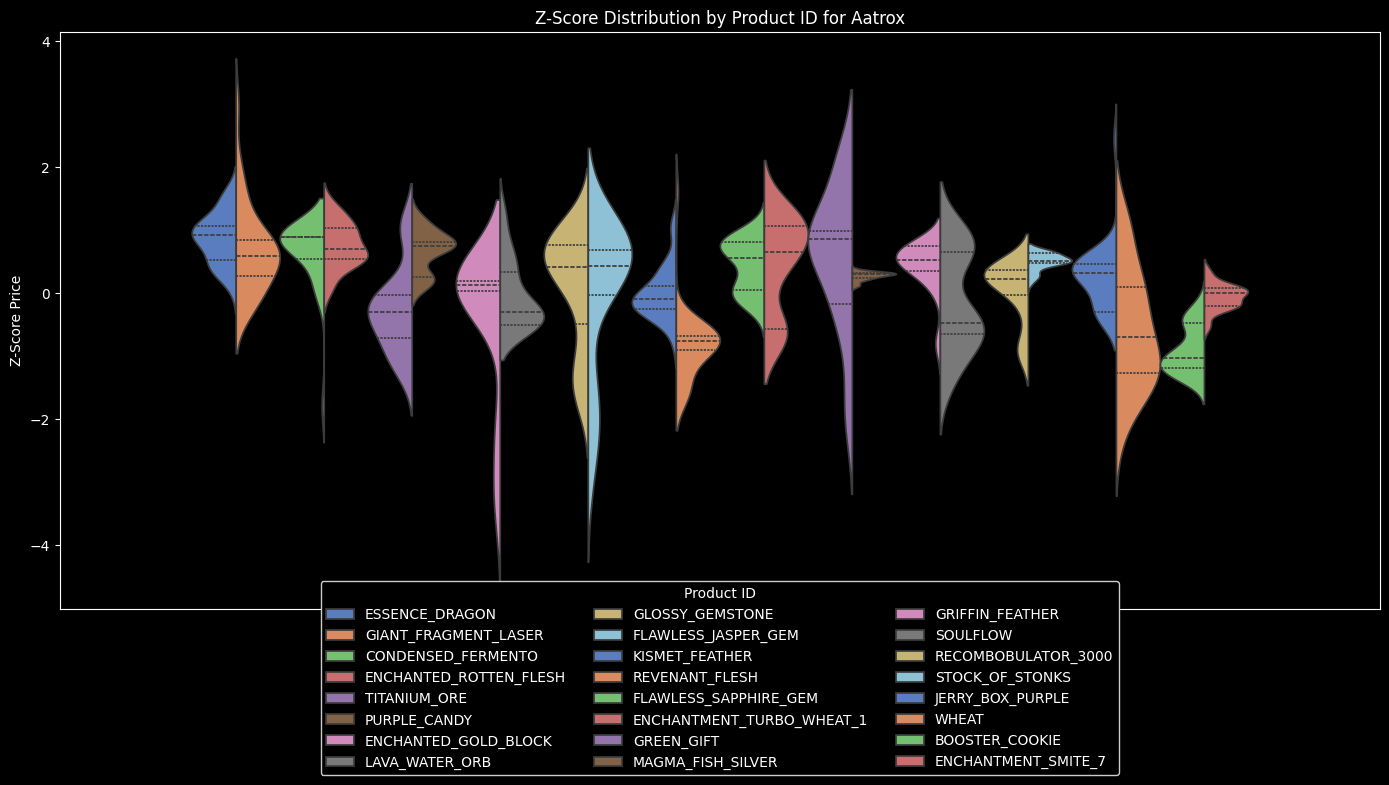

In [7]:
#Aatrox
mayor = mayors[2]
mayor_data = sbDF[sbDF["Mayor"] == mayor]

fig, ax = plt.subplots(figsize=(14, 8))

sns.violinplot(data=mayor_data, x="Mayor", y="Z-Score Price", hue="Product ID",inner="quart", ax=ax, split=True,  palette="muted") 
ax.set_title(f"Z-Score Distribution by Product ID for {mayor}")
ax.set_xlabel("Mayor")
ax.set_ylabel("Z-Score Price")
    
leg = ax.legend(title='Product ID', loc='center', bbox_to_anchor=(0.5, -.12), ncol=3, framealpha=1)

plt.tight_layout()
plt.show()

# I had this issue before, and it shouldn't happen, but when I changed the theme everything got distorted, I reset and it looks good again

# About Aatrox
Aatrox is a mayor who buffs the in-game mechanic Slayers, or bosses in which you fight for extremely rare and desirable loot. Every boss costs a specific amount of money, and require a specific amount of experience gained from the related mob type. Overall, they are a coin sink, as the drops are sold on the bazaar and auction house, with the NPC prices still being lower than the bazaar.

## Positive Observations
    More items than not increase their price! Which attests to the 'coin sink' theory. 

    Dragon essence : This is used for a few upgrades, item and permanent player upgrades. Likely, increase due to players needing it for combat.

    Candy: This is interesting, Candy comes from the 'spooky event', and the way to get it is to have it dropped by mobs and from chests. My intial theory would be expected to drop the 
    price, however it seems that there is likely desire for items obtainable using candy. 
    Gems: Enhance combat potential
    Recombobulator (recomb): Generally up, less dungeons (source of item) and more players needing to increase stats.

    Stock of Stonks: The next mayor is Diaz, who needs these for upgrades.
    
    



## Negative
    As predicted, Smite 7 (while it did not go down a lot and is mostly neutral) did go down from finnegan, being slightly below 0.
    Revenant Flesh : Since so many bosses are being fought, the price of this decreases.
    Kismet: Less incentive for 'dungeons' or where this item is used. Likely, players need coins to spawn bosses, so they're being sold.
    Wheat: I believe this is simply players moving on
    Fermento: Not as much supply as before / certain upgrades desired

    Soulflow: Eeriely enough, this is lower, possibly since everyone has bought enough before hand? Not conclusive.


# Conclusion
Aatrox is a general coin sink, meaning the value of coins increases as a result. In the future I may want to do an analysis on the auction house items, however with the resources and time I have I cannot do this.


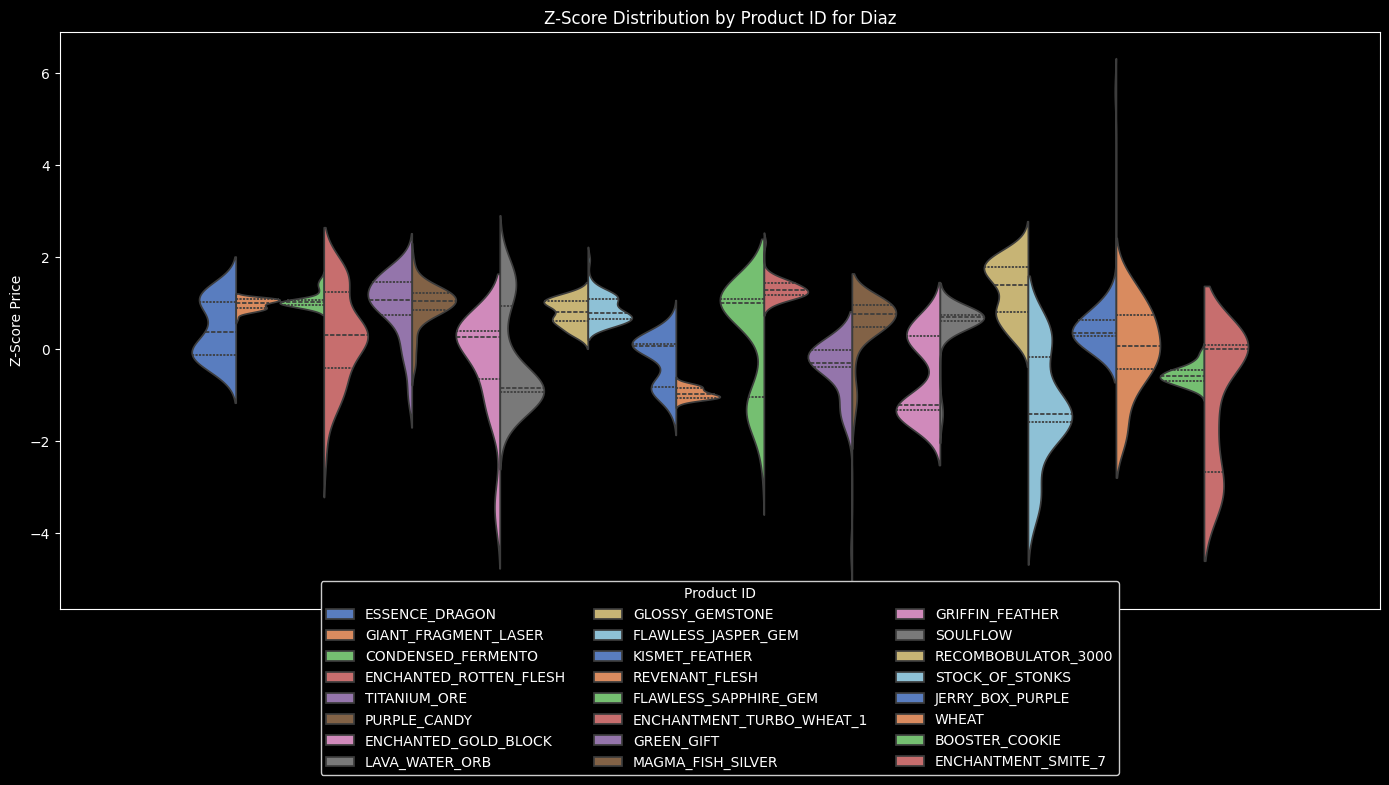

In [8]:
#And Diaz
mayor = mayors[3]
mayor_data = sbDF[sbDF["Mayor"] == mayor]

fig, ax = plt.subplots(figsize=(14, 8))
    

sns.violinplot(data=mayor_data, x="Mayor", y="Z-Score Price", hue="Product ID",inner="quart", ax=ax, split=True,  palette="muted") 
ax.set_title(f"Z-Score Distribution by Product ID for {mayor}")
ax.set_xlabel("Mayor")
ax.set_ylabel("Z-Score Price")
    
leg = ax.legend(title='Product ID', loc='center', bbox_to_anchor=(0.5, -.12), ncol=3, framealpha=1)

plt.tight_layout()
plt.show()

# About Diaz
Diaz is a mayor who intially had little incentive to be voted in, due to a recent update, we have new content and a large reason to vote for them!.
    What they do:
    > Stock auctions: Before these were limited items that were no longer purchasable, now they are obtainable through this auction. Another coin sink!
    > Bank Interest: Increases bank interest (Light inflation)
    > NPC buy limits: Years ago, this was introduced preventing infinite items being bought, diaz now increases the limit by 10 times, allowing players to add items to the bazaar ideally to lower the prices.


## Positive observations
    Kismet : Increasing, likely coin sink, as the next mayor shouldnt impact Dungeons, where this item is used
    Soulflow: Increasing, (People running out of soulflow after Aatrox is likely)
    Recombobulator: HUGE update, means player have abilty to reduce grinding 10 fold in late game, therefore people are creating their maxxed out sets.
    

## Negative Observations
    Stock of Stonks: In the previous mayor, we saw them roughly on par with the average price, however after diaz there is an extreme price drop.
    Lava water Orbs: Mentioned before, there was an update recently which changed the limitations of certain items, this is an item effected by the recent update. 

## Conclusion
    This is likely a good time to look into stock of stonks, but more importantly, the market is doing very well here.


### Whats next
I will be creating a decision tree in order to see where the majority of the impact comes from (Since splits are going to favor those)

In [9]:
# More imports
import random

In [10]:
# Necessary Pre-processing
sbDF['Hour'] = pd.to_datetime(sbDF['Timestamp'], unit='ms').dt.hour # Super convienient, needed for player analysis!

Text(0, 0.5, 'Players On Skyblock')

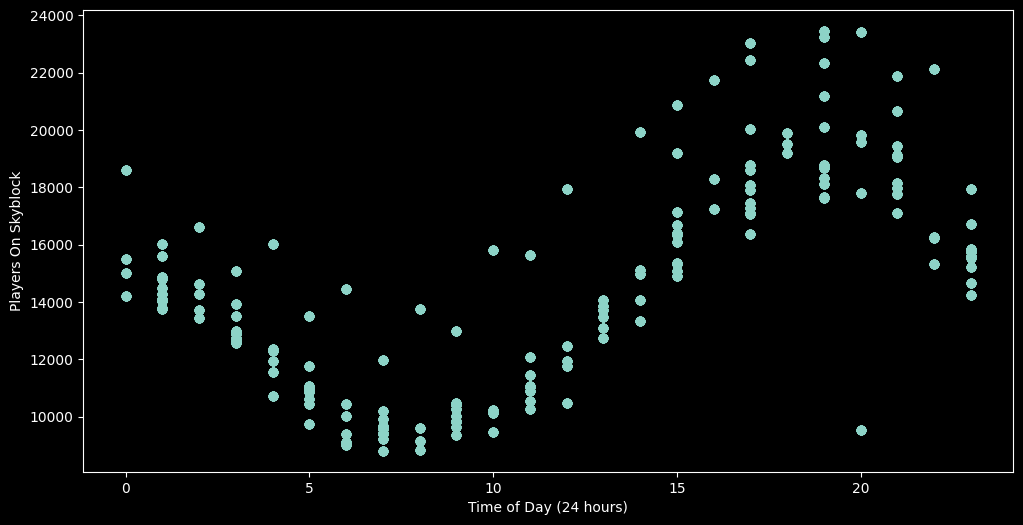

In [11]:
# We can now properly analyze the playercount (based on time)!
Players = sbDF['Player Count']
Time = sbDF['Hour']  #Converted from timestamp to hour correlated

#Scatter to get rough itea
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(Time,Players)
ax.set_xlabel('Time of Day (24 hours)')
ax.set_ylabel('Players On Skyblock')


C:\Users\sithu\AppData\Local\Temp\ipykernel_8524\4038854743.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='center', bbox_to_anchor=(1, 1))


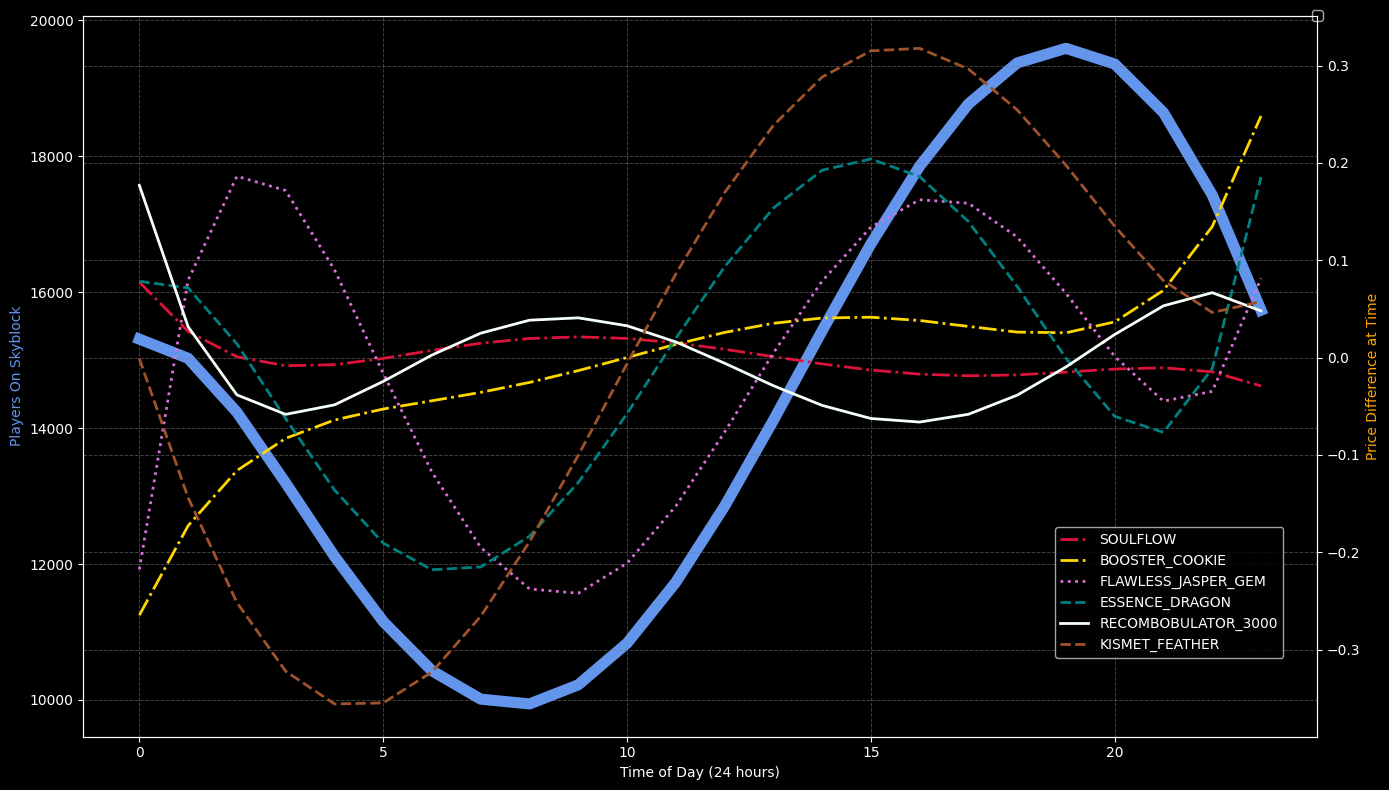

In [12]:
#Lets Sort this to allow for our quadratic representation
Sorted_By_Hour = sbDF.sort_values(by='Hour')

# So what does the pricing look like of specific items during these times?
Players = Sorted_By_Hour['Player Count']
Time = Sorted_By_Hour['Hour'] 


# We're gonna change the modelling to be a line for players (Less clutter)
PCount_line = np.polyfit(Time, Players, 5) # I chose this degree due to shape of graph, Anything 3 and above should suit


# Predictions using the above line
PCount_pred = np.polyval(PCount_line, Time)


#Plot the line of players
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.plot(Time, PCount_pred, color = "cornflowerblue", linewidth=8)
ax1.set_xlabel('Time of Day (24 hours)')
ax1.set_ylabel('Players On Skyblock', color = 'cornflowerblue')


#I am going to look at general items for this, given the simplicity of graphing this is going to tell the most potentially.
items = {"FLAWLESS_JASPER_GEM","KISMET_FEATHER","ESSENCE_DRAGON","RECOMBOBULATOR_3000","SOULFLOW","BOOSTER_COOKIE"}
ax2 = ax1.twinx() #split since axis scaling is different

#In the future I will need this
line_styles = ['-', '--', '-.', ':']
#Default style colors make this grouping blend in, I will chose punchier colors
colors = ['crimson','gold','orchid','teal','mintcream', 'sienna']

# This will plot every item! ideally this shows how time affects this.
cid = 0
for product in items:
    #Both normal and scatter plots look messy / do not show trends nicely.
    product_data = Sorted_By_Hour[Sorted_By_Hour['Product ID'] == product]

    # Were gonna fit this since its going to give the better pattern
    product_line = np.polyfit(product_data['Hour'], product_data['Z-Score Price'], 5)
    product_pred = np.polyval(product_line, product_data['Hour'])
    # Plot our best fit line (per product)
    ax2.plot(product_data['Hour'], product_pred, label=product, linestyle = random.choice(line_styles), color = colors[cid], linewidth = 2)
    cid = cid+1


# Add labels for the second y-axis
ax2.set_ylabel('Price Difference at Time', color = 'orange')
ax2.tick_params(axis='y' )

# These were too bright before
ax1.grid(which='both',axis='both', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
ax2.grid(which='both',axis='both', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
# This location doesn't obscure information
ax1.legend(loc='center', bbox_to_anchor=(1, 1))
ax2.legend(loc='center', bbox_to_anchor=(.88, 0.2))

plt.tight_layout()  # Ensures everything fits
plt.show()

#Future me to past me: these comments are partially useless. We need WHY not what, generally.

In [13]:
# Machine learning imports
from sklearn.metrics import mean_squared_error
# Since I am using a tree, I figured boosting would give more 
# detailed insight into how playercount and numerical values
# impact overall accuracy
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [14]:
# Here we can do a more indepth analysis.

#Need to create categories soo... map this
mayor_mapping = {
    'Scorpius': 0,
    'Finnegan': 1,
    'Aatrox': 2,
    'Diaz': 3
}
sbDF['Mayor ID'] = sbDF['Mayor'].map(mayor_mapping)


# We will set up data 
Predictors = sbDF.drop(columns=['Product ID', 'Z-Score Price',  'Average Price Per Unit', 'Timestamp', 'Time_Bucket','Mayor', 'Total Amount']) 
Target = sbDF['Z-Score Price']

#Need this, I ignored it initally however I kept producing overfit models.
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size=0.2, random_state=42)


# Rationale: Product id is useless for prediction, rather we want individual trees for items
# Z-score Price is the target; Average price is not what we want; timestamp will be exchanged for 'Hours', Mayor gets changed to a numerical value
# Time bucket was a one-off element
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test,  enable_categorical=True)
# setting up arguments : These will be the baseline
params = {
    'objective': 'reg:squarederror', #We will be having a continuous output
    'max_depth': 4,                # We can play with this
    'eta': 0.1,                  # Learning rate (low = more steps)   
    'subsample': 0.8,               #Similar to bootstrapping, this selects from data
    'colsample_bytree': 0.8,       #this selects for tree
    'lambda': 2.0,                 
    'alpha': 0.5,                  
    'min_child_weight': 5,   # Prevent overfitting      
    'eval_metric': 'logloss'    
}



# Train XGBoost Model
bst = xgb.train(params, dtrain, num_boost_round=100) #This can be adjusted later, some random arbitrary number

# Predictions
y_pred_xgb = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse}")

#Not bad honestly

KeyError: "['Time_Bucket'] not found in axis"

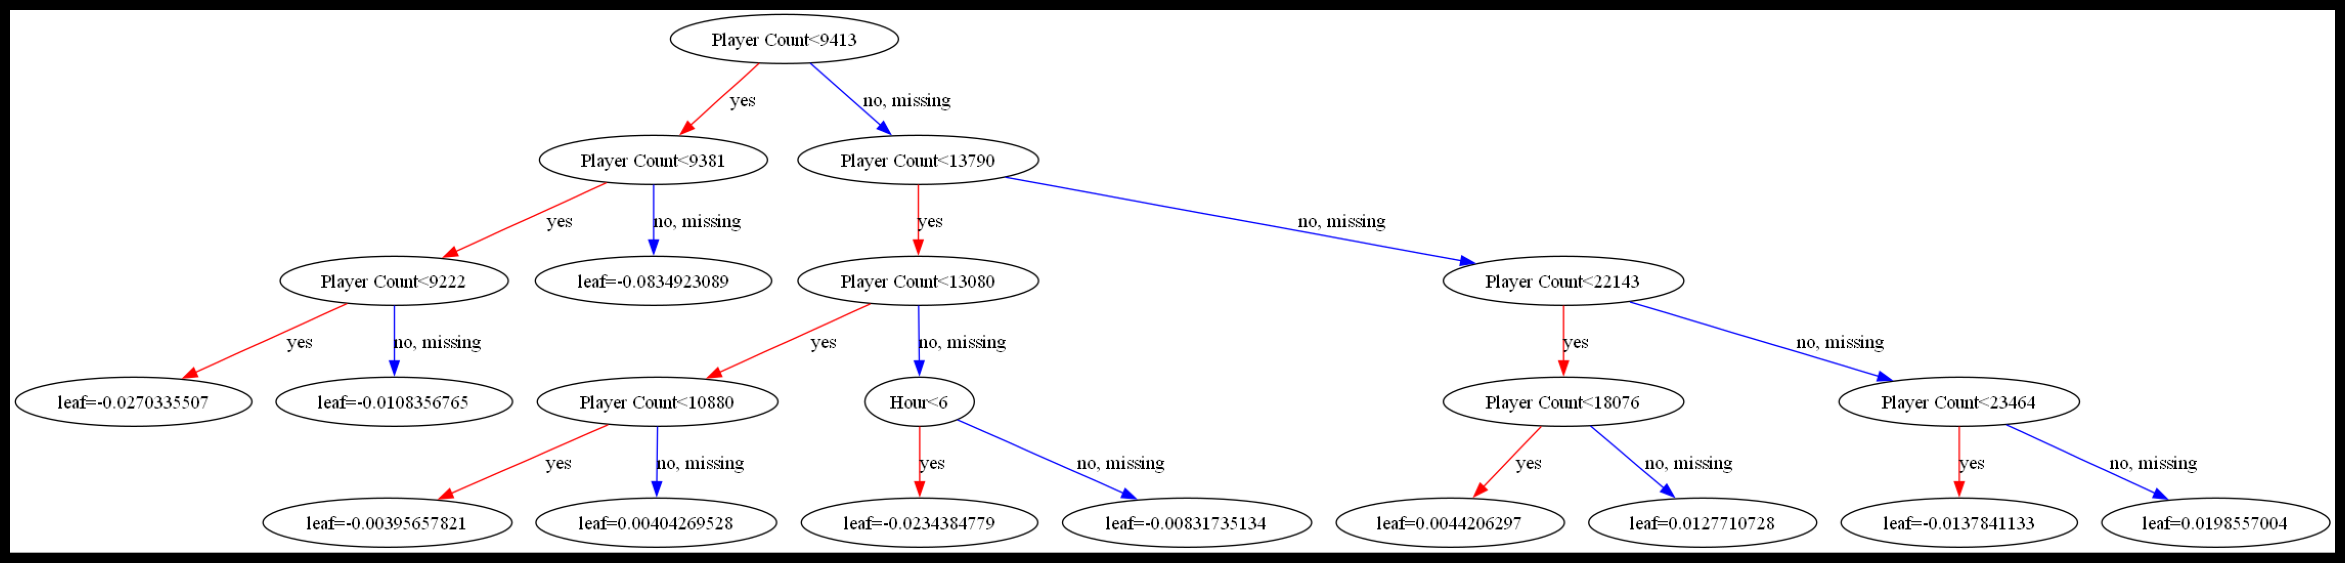

In [ ]:
# Lets actually look at the tree now.

#These trees are ginormous, we need an appropriate figure size
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(bst, num_trees=0, ax=ax) #Sometimes this give weird results
plt.show()

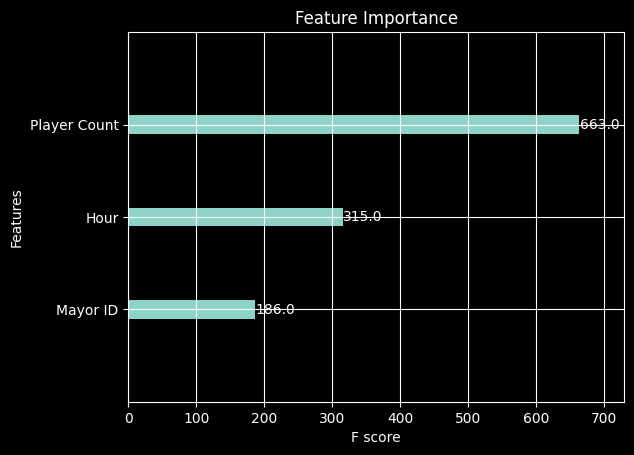

In [ ]:
from xgboost import plot_importance

# Lets actually show what impacts this the most
plot_importance(bst, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

# Observations
It seems that Player count has the largest impact on the OVERALL items. This sort of ties back to one of my theories that due to an increase of players at certain times, supply and demand change accordingly. However, this leaves a few things open! As we saw, my model performed 'okay', a 1 error when most of the results will be between -10 and 10 (more commonly between -5 and 5) means there can be a marginal error. What can we do to improve this?

## Changes to the model
I will be adding a few different metrics in the form of feature engineering. For one I will include 'playercount_lag' which will represent the playercount from the hour before. This should allow us to visualize how player activity (Likely in the form of money making) will affect the economy

## Purpose of Item selection
I had known (and experienced) that certain items favor specific mayors. A better option than simply checking the trends, we can see how every item is impacted by their relative traits.

## Outside factors
While this may give some questionable results, it is possible to draw certain correlations between searches and trends in item prices! I will attempt to look into this.



In [ ]:
# Before any of that, lets experiment with how low we can get MSE, this may need to be altered as I feature engineer, but this can give us additional insight

params = {
    'objective': 'reg:squarederror', 
    'max_depth': 3,                # Start with this: Depth 3 = slightly better. 5 = bad
    'eta': 0.15,                  # .15 improves!
    'subsample': 0.8,             # This shouldn't require change, however I tested .75 > higher mse. same with .85, no need for change
    'colsample_bytree': 0.8,       
    'lambda': 2,               #Next this, similarly had negative responses 
    'alpha': 0.5,                  # Both negative responses.
    'min_child_weight': 5,   # Still limited impact
    'eval_metric': 'logloss'    
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse}")

#Not a large increase unfortunately

Mean Squared Error: 0.9574300992792192


# What can we do to make a better model?
I will begin feature engineering. I talked about this before, but there are a lot of things I can add in order to get more granular data, such as the change, time, and volatility. Now, unfortunately some of these features can give false positives!
What I mean by this is that these features may be similar to hashes. A specific instance, of a specific object can be more closely determined if we have more inforation, such as how much it changed in conjunction with everything else. However, by utilizing a train and test set, I can reduce this largely, so this model SHOULD be remotely useful.

In [ ]:
# Lets add the lag feature, I will try 1,2, and 6 hours. I doubt 6 hours will have a great impact, however I suspect 1 and 2 to have larger impacts.
sbDF['lag_1hr'] = (sbDF['Hour'] - 1) % 24
sbDF['lag_2hr'] = (sbDF['Hour'] - 2) % 24
sbDF['lag_6hr'] = (sbDF['Hour'] - 6) % 24 # We subtract the amount respectively, then do modulo to account for negatives. 
#I want to say that this element on its own may not predict much, but in tangency with other information can prove useful.

#This is another metric I wanted to add which is day of the week
sbDF['Day'] = pd.to_datetime(sbDF['Timestamp'], unit='ms').dt.day_of_week # Super convienient, needed for player analysis!
# Note: day correlation is 0 mon, 1 tue, 2 wed, 3 thur, 4 fri, 5 sat, 6 sun We will assume more players are on during weekend, however this will need to be analyzed later.

# Change in supply
sbDF['lag_amount'] = sbDF['Total Amount'].shift(24) # 25 keywords
sbDF['change_in_supply'] = sbDF['Total Amount'] - sbDF['lag_amount']

# I do not want the first data point for each item to skew the data!
sbDF['change_in_supply'] = sbDF.groupby('Product ID')['change_in_supply'].transform(lambda x: x.fillna(x.bfill().iloc[0]))
sbDF['lag_amount'] = sbDF.groupby('Product ID')['lag_amount'].transform(lambda x: x.fillna(x.bfill().iloc[0]))


#We want a volitility predictor, I think having this as a day-to-day basis is best, since it can adapt, and should indicicate manipulation
#First we can create the coeffficient of variance, or a ratio of the standard deviation to the mean
sbDF['CV'] = sbDF.groupby('Product ID')['Total Amount'].transform('std') / \
             sbDF.groupby('Product ID')['Total Amount'].transform('mean') # this ends up telling us its overall volitility, which can be indicitive of strange
# behavior. 

#Here we can flag cases where either the CV is naturally high, meaning a risky item
sbDF['Change_Ratio'] = sbDF['Total Amount'] / sbDF['lag_amount']
sbDF['Volatility'] = np.where(
    #not (sbDF['CV'] >= 1) |  Consider in the case you want to avoid risky items, otherwise we are going to check whether the change is 'acceptable'
    (((sbDF['Change_Ratio']**2) < (-5 * ((sbDF['CV']-.5)**2) + 2)) & #Exp punishes high / low more.. Plus parabolic relationship (Punish high and low CV's)
    ((sbDF['Change_Ratio']**2) >= .5)),  #otherwise test against to see if difference exceeds the threshold... We do not want half of stock / double stock
    0,  # Non-volatile
    1   # Volatile
) #I can spend hours finding the perfect formula, but these results are good for demonstration

# Since I am messing around with a lot of factors, I am going to write to a csv to ensure data looks good!
sbDF.to_csv('test.csv', index=False) 

In [ ]:
#Lets try making a tree again to see if we can get better results
newPred = sbDF.drop(columns=['Product ID', 'Z-Score Price',  'Average Price Per Unit', 'Timestamp', 'Time_Bucket','Mayor', 'Total Amount','CV']) 
Target = sbDF['Z-Score Price']

X_train, X_test, y_train, y_test = train_test_split(newPred, Target, test_size=0.2, random_state=42)

dtrain_new_preds = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest_new_preds = xgb.DMatrix(X_test, label = y_test,  enable_categorical=True)

# These are the same as before
params = {
    'objective': 'reg:squarederror', 
    'max_depth': 4,              
    'eta': 0.1,                
    'subsample': 0.8,            
    'colsample_bytree': 0.8,    
    'lambda': 2.0,                 
    'alpha': 0.5,                  
    'min_child_weight': 5,  
    'eval_metric': 'logloss'    
}


bst_new_preds = xgb.train(params, dtrain_new_preds, num_boost_round=300) # Upped this to allow for a more comprehensive analysis, since we added so many params, added 200 tests

predictions = bst_new_preds.predict(dtest_new_preds)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

#And with this, Mse goes down by .10 without changes to original, lets alter parameters.

Mean Squared Error: 0.826507844915336


In [ ]:
# Now we're gonna reduce MSE by messing with factors again

params = {
    'objective': 'reg:squarederror', 
    'max_depth': 3,    # Decrease depth to 3 gives better results 
    'eta': 0.05, #Decrease = improvement             
    'subsample': 0.8,            
    'colsample_bytree': 0.8,    
    'lambda': 2.2,         #Increase = good         
    'alpha': 0.5,         #negative around
    'min_child_weight': 5,  # negative around
    'eval_metric': 'logloss'    
}

# Train XGBoost Model
bst_new_preds = xgb.train(params, dtrain_new_preds, num_boost_round=300) 
# Predictions
predictions = bst_new_preds.predict(dtest_new_preds)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

#We cut off about .02 MSE, so not amazing but cool

Mean Squared Error: 0.811123989277155


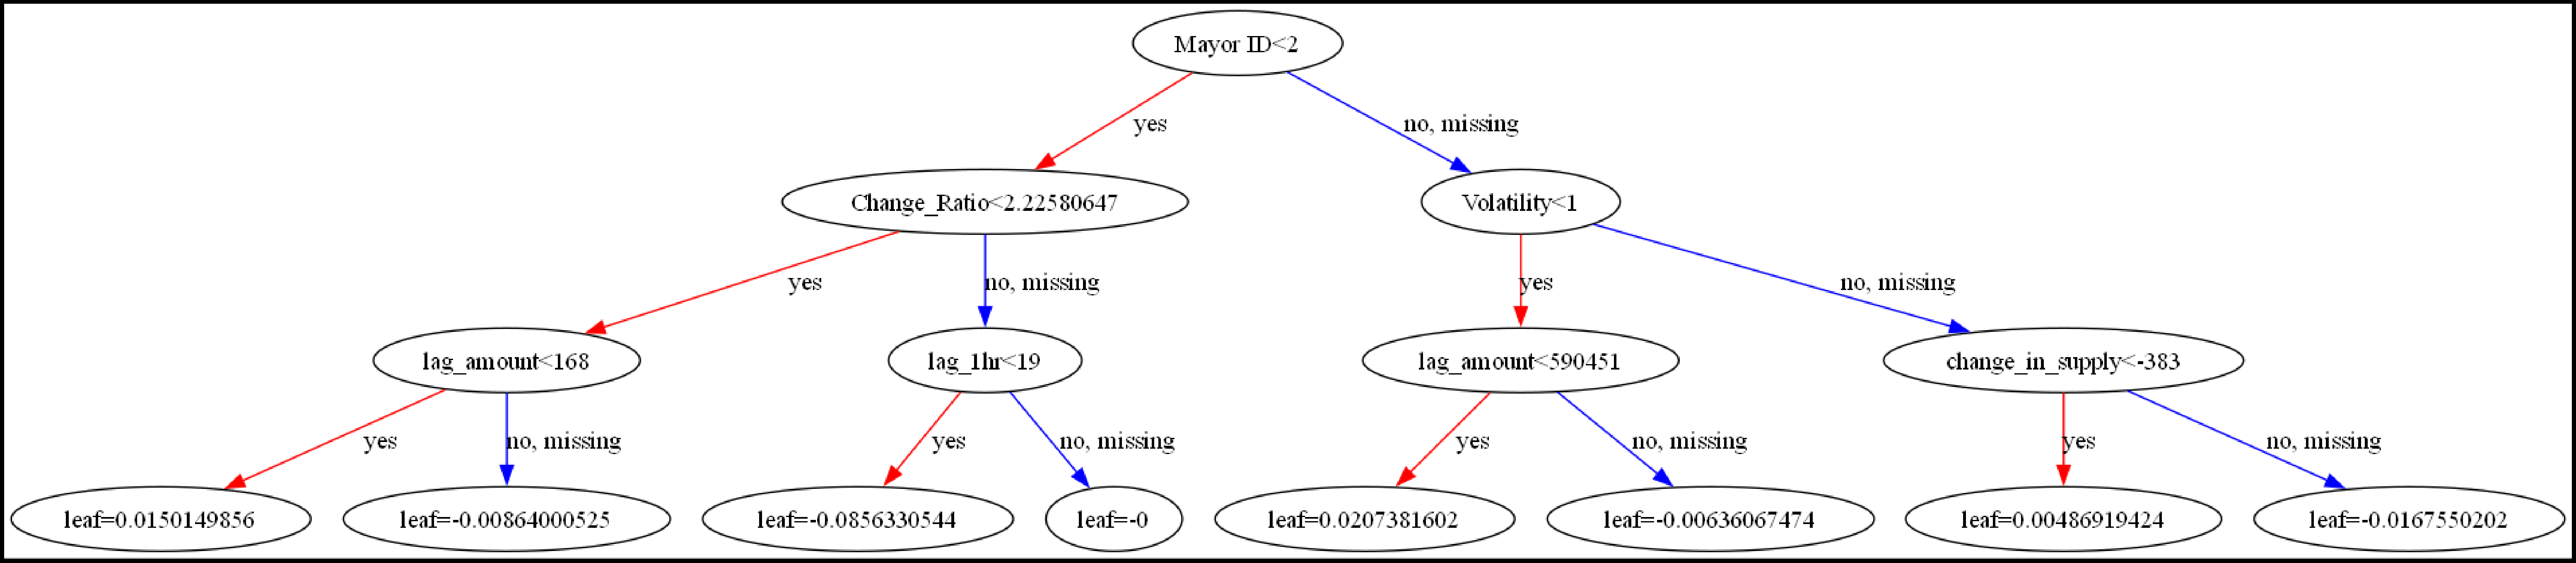

In [ ]:
# Lets actually look at the tree now.

fig, ax = plt.subplots(figsize=(80,80))
xgb.plot_tree(bst_new_preds, num_trees=0, ax=ax)
plt.show()

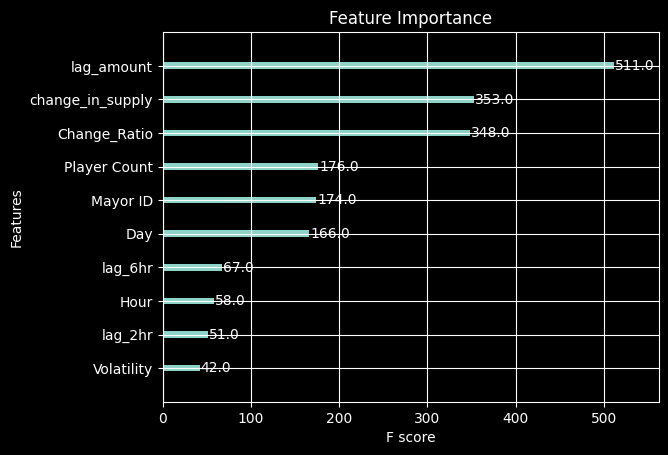

In [ ]:
plot_importance(bst_new_preds, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

# Conclusion
    I believe the lag hours and hours have minimal impact, I think they prove a false positive in a way, mostly since they can be more closely associated to the specific listing. 
    Day: Provides insight into potentially more players on specific days! I will graph this later
    The top 3 predictors give insight into supply, and are unique across the board, making them good predictors
    Now this general model is not great, you will likely not be able to predict and profit from this, but what about individual items? I hinted at the idea that certain items react to specific mayors in special ways. Of course, I would love more data, but I will explore this.

## Volatility
I will graph this soon, since its class based rather than a number, it doesn't give enough insight (There are 2 classes, for 25 items). This is more good as a cautionary measure, meaning you test if an item is volitile at a certain time and decide whether its worth to capitalize, or to fear for extreme manipulation!

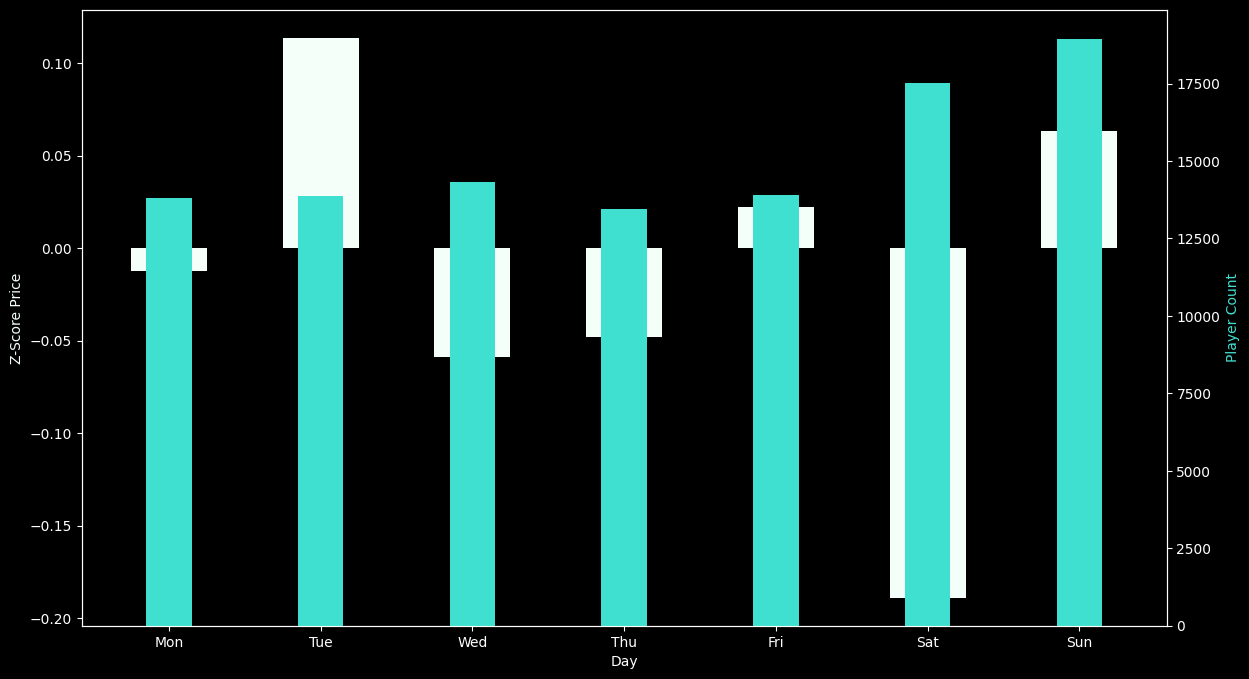

In [ ]:
# We can check some thins here, namely price and player count on the specfic days :>
fig, ax1 = plt.subplots(figsize=(14, 8))

#Aggregate to see average days
daily_ZSCORE = sbDF.groupby('Day')['Z-Score Price'].mean()
daily_PC = sbDF.groupby('Day')['Player Count'].mean()

#Masks (do not want 4k vals) 
days = [0,1,2,3,4,5,6]

# This plots the daily Zscore
ax1.bar(days, daily_ZSCORE[days], width=0.5,color='mintcream', label='Z-Score Price', align='center')
ax1.set_xlabel('Day')
ax1.set_ylabel('Z-Score Price', color = 'mintcream')

#This is for hte Playercount
ax2 = ax1.twinx()  # This shares the same x-axis but has a separate y-axis
ax2.bar(days, daily_PC[days], width=0.3, color='turquoise', label='Player Count', align='center')
ax2.set_ylabel('Player Count', color='turquoise')


ax1.set_xticks(days)  
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Since data is numerical, we want names of days

plt.show()

# This graph gives us insight into how both player count affects Z-score, and on average how the days look for general pricing.
# In future, may want to go into specific objects since we're predicting about 25 objects worth of variation. 

# Observations
The weekend has the largest number of players on, and while not definite, it seems like players are more likely to grind and sell on saturday, and to buy on sunday. Tuesday also seems to have eeriely high average buy prices.
>We cannot 100% guarantee this, especially with the potential volitility of the data, which I will graph next to show potential concern.

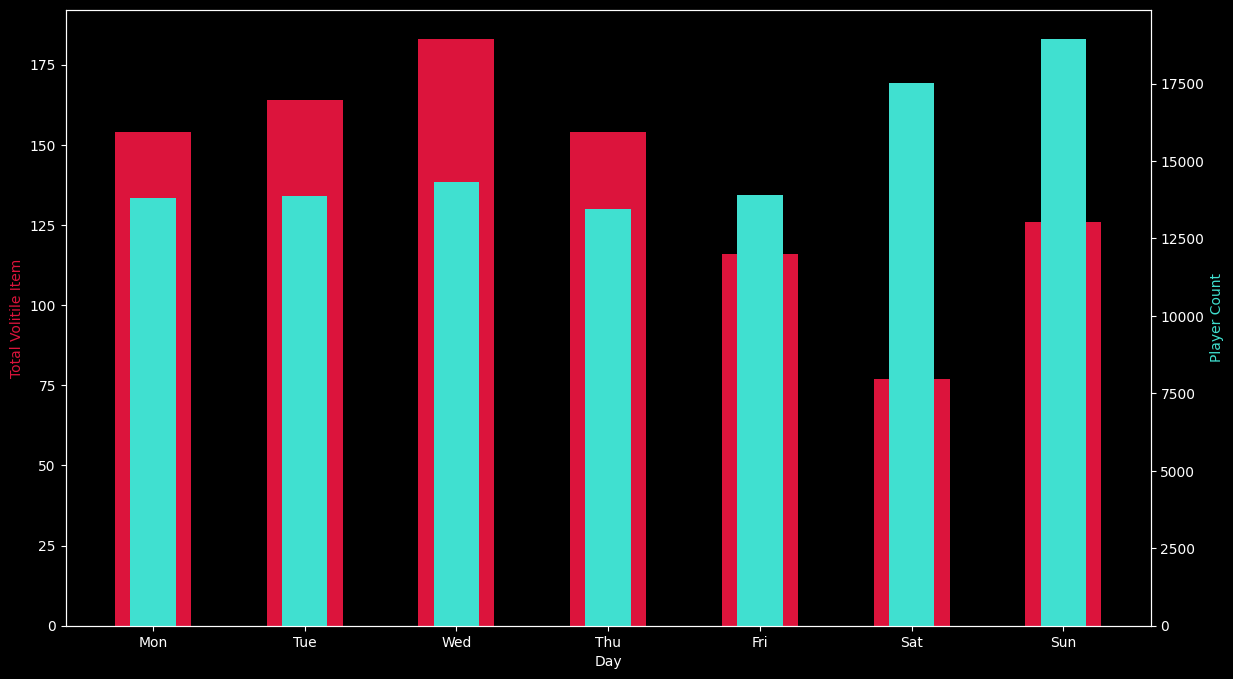

In [ ]:
# We can check some thins here, namely price and player count on the specfic days :>
fig, ax1 = plt.subplots(figsize=(14, 8))

#Aggregate to see average days
daily_Volitility = sbDF.groupby('Day')['Volatility'].sum()


#Masks (do not want 4k vals) 
days = [0,1,2,3,4,5,6]

# Repeat but now with TOTAL volatility
ax1.bar(days, daily_Volitility[days], width=0.5,color='crimson', label='Total Volitile Items', align='center')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Volitile Item', color = 'crimson')


ax2 = ax1.twinx()  # This shares the same x-axis but has a separate y-axis
ax2.bar(days, daily_PC[days], width=0.3, color='turquoise', label='Player Count', align='center')
ax2.set_ylabel('Player Count', color='turquoise')


ax1.set_xticks(days)  
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Since data is numerical, we want names of days# Add labels and title


plt.show()

# Observations
Similarly, its not 100% conclusive, however we can predict some of the supply and demand flow throughout the week. When more players are on, we actually balance out the economy more, and while less players are getting resources, we have more times when the supply is not getting either replenished enough, or simply bought out by those very active.

Let us see how individual items react to the tree

In [ ]:
#These will remain the same
newPred = sbDF.drop(columns=['Product ID', 'Z-Score Price', 'Average Price Per Unit', 
                             'Timestamp', 'Time_Bucket', 'Mayor', 'Total Amount', 'CV'])
Target = sbDF['Z-Score Price']

# We can store our results here
models = {}
metrics = {}

#Now we must aggregate them, or combine them based on product ID
for product_id in sbDF['Product ID'].unique(): #Ensure we do not duplicate and do this 4k times
    
    # Mask to get data for product
    product_data = sbDF[sbDF['Product ID'] == product_id]
    X = newPred.loc[product_data.index] 
    y = Target.loc[product_data.index]
    
    # Same as before, we want to split again
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #and group appropriately for xgb
    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

    # These will remain unchanged, due to the scale of impact
    params = {
        'objective': 'reg:squarederror', 
        'max_depth': 4,              
        'eta': 0.1,                
        'subsample': 0.8,            
        'colsample_bytree': 0.8,    
        'lambda': 2.0,                 
        'alpha': 0.5,                  
        'min_child_weight': 5,  
        'eval_metric': 'logloss'    
    }
    
    # We lower the amount of trees since we're testing 25 ttrees
    bst = xgb.train(params, dtrain, num_boost_round=100)

    # Same thing predict here
    predictions = bst.predict(dtest)
    mse = mean_squared_error(y_test, predictions)
    
    # Finally we can view our results
    models[product_id] = bst
    metrics[product_id] = mse
    print(f"Mean Squared Error for Product ID {product_id}: {mse}")

# This is super cool!

Mean Squared Error for Product ID ESSENCE_DRAGON: 0.5238336898718412
Mean Squared Error for Product ID GIANT_FRAGMENT_LASER: 0.3216968679478734
Mean Squared Error for Product ID CONDENSED_FERMENTO: 0.11155580360387045
Mean Squared Error for Product ID ENCHANTED_ROTTEN_FLESH: 0.2845227484119494
Mean Squared Error for Product ID TITANIUM_ORE: 0.2225126930181308
Mean Squared Error for Product ID PURPLE_CANDY: 0.12141784164251956
Mean Squared Error for Product ID ENCHANTED_GOLD_BLOCK: 0.5301067188572771
Mean Squared Error for Product ID LAVA_WATER_ORB: 0.29412136502290603
Mean Squared Error for Product ID GLOSSY_GEMSTONE: 0.6082984849471139
Mean Squared Error for Product ID FLAWLESS_JASPER_GEM: 0.6667626383054184
Mean Squared Error for Product ID KISMET_FEATHER: 0.6805002716201525
Mean Squared Error for Product ID REVENANT_FLESH: 0.17037478679704468
Mean Squared Error for Product ID FLAWLESS_SAPPHIRE_GEM: 0.3556092731790648
Mean Squared Error for Product ID ENCHANTMENT_TURBO_WHEAT_1: 0.019

# Observations
Wheat seems concerning volatile, or atleast there are more factors that impact it compared to what I have provided. 
However, what my model does a good job at (so far) is predicting Booster cookies, Smite 7, Recombobulators, Turbo wheat, purple candy, condensed fermento, and titanium ore (These are the ones that were below a .2 MSE, which should be able to indicate exactly when these are increasing or decreasing) 
Of course, keyword being should be. I would love to try this with more data, however today is submission day!

## Below
Consult here : https://hypixel.net/threads/hypixel-skyblock-0-20-9-crimson-isle-qol.5809290/ for changes related to this. This post was likely after the update (I had heard of it after, so I will use the thread as a timestamp for comparison)

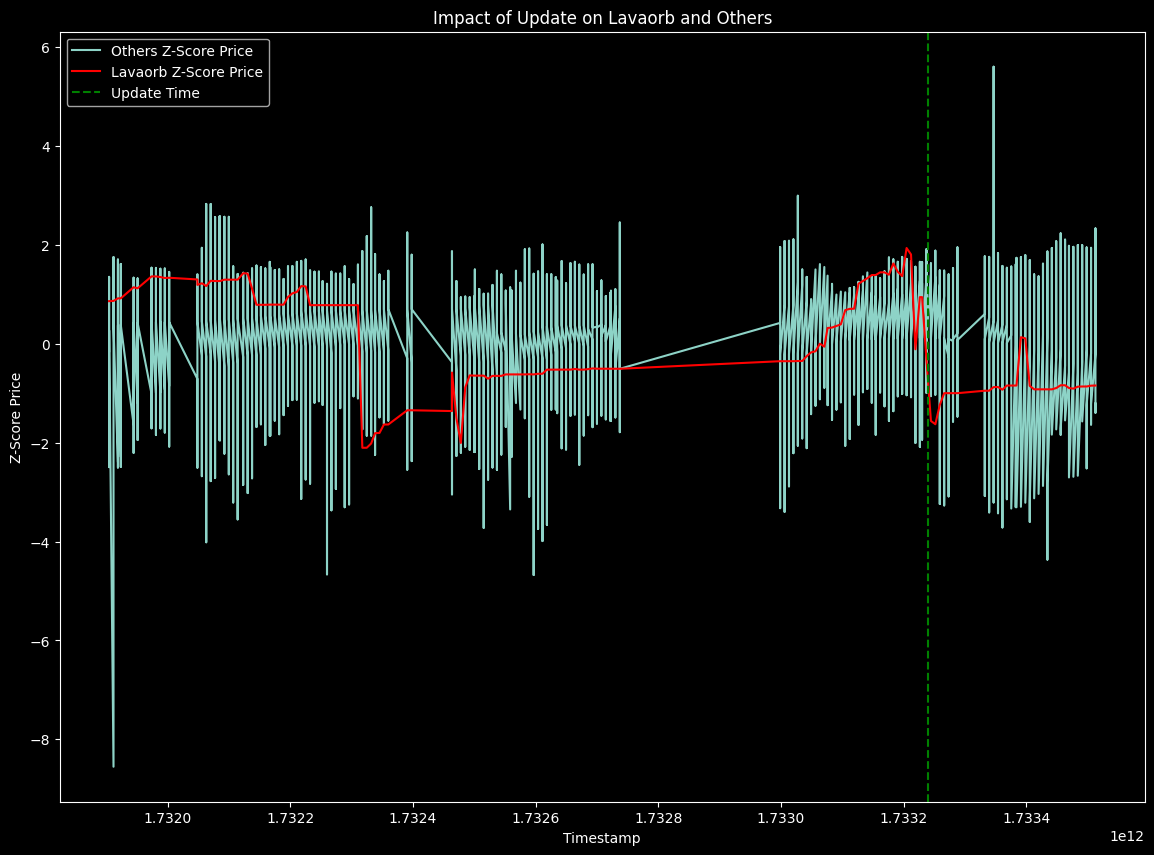

In [ ]:
# Filter data for Lavaorb and others
Lavaorb = sbDF[sbDF['Product ID'] == 'LAVA_WATER_ORB']
Others = sbDF[sbDF['Product ID'] != 'LAVA_WATER_ORB']  # Correctly filter others

# The update arrived 12/3 10:18 am (~1733239100000 in epoch time)
update_time = 1733239100000

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))


# Plot data
ax.plot(Others['Timestamp'], Others['Z-Score Price'], label='Others Z-Score Price')
ax.plot(Lavaorb['Timestamp'], Lavaorb['Z-Score Price'], label='Lavaorb Z-Score Price', color='red')


# Highlight the update time
ax.axvline(update_time, color='green', linestyle='--', label='Update Time')

# Add labels, title, and legend
ax.set_xlabel('Timestamp')
ax.set_ylabel('Z-Score Price')
ax.set_title('Impact of Update on Lavaorb and Others')
ax.legend()

# Show the plot
plt.show()


# Observations
While this graph shows every single data point, I believe it does model something important. The items directly affected by the update show an increase or decrease depending on the supply and demand, in this case, the supply increased because the required materials are now more easily accessible. 
The other items generally maintain stability, the market changes for specific items, whether increases or decreases.


## Money Making Methods
From my knowledge, there is one money making method that is 'new', and it comes from this update. Of course other updates have been there, but my data will not reflect this. This data shows the money making method in question, an item that was previously locked behind accounts is purchasable, and as a result, the materials now are worth to farm. Does player count increase after the update..?

## Previous money making methods (If youre interested, this has minimal analysis since I do not have data for it)
Note: These are the ones I am most familiar with

Salesmen - just like in real life, they buy and sell items, simply buy high sell low. (Coin sink ~ interest)
Farmers - Mentioned before, they 'print' money, by farming crops, from my knowledge ~ 20 million coins an hour (Coin Creator)
Fishers - They have potential to drop some of the items (Lava water orbs) and have access to other high rarity items worth upwards of 200 million, I do not have data to efficiently analyze (Coin Creator)
    There are 3 kinds of fishing
    > Lava: Highest reward, slow generally, where high rarity loot is actually desireable
    > Normal: Now has been outscaled, the high rarity drops minimal value
    > Event: Spooky / Fishing festival have medium rarity items (That I do not explicity have). We do have candy. 
Combat - I categorize this into 2 primary things: Rng grinding, normal grinding, Bosses 
    Rng Grinding: There are extremely rare items, all of which are on AH, I do not have details, however there is Zealot grinding, Scatha, Dye, Pet items (Both)
    Normal Grinding: Now with crimson update, still some items are necessary to have an infinite amount of usability. Anything on crimson Isles, some additional mobs (coin creator)
    Bosses: Bal, Dungeons, Kuudra, Crimson Isle Bosses, Slayers, Arachne, Dragons (Coin Sink)
Foraging - Useless at this point, expected update later on however. (coin creator)
Mining - Similar sort of idea to Farming, however we have things called nucleus runs which have a chance of also dropping extremely rare items. (coin creator)
    > Crystal Hollows: Allows Gem mining and Nucleus, Specific enemies drop valuable items (Corleone / Bal) ~30-50m/hr? 
    > Dwarven Mines: You can mine titanium and mithril, ~30m/hr when SUPER end game, better to mine gems. Ghosts can be farmed for their experience / drops, recent update changed how Forge works, meaning while you do one thing, you can have mulitple factors contributing their benefits
    > Forge: Produces items, generally afk grind (since the items crafted are used in other recipes... and it takes time. People pay for time)
Pelts...? - I dont think these make any money, but to each their own

## Is the economy Stable?
At the moment, Yes. I believe currently, were in a sort of drought. There are much less players on at the moment than I am used to, but from what I can tell there is still interest in skyblock, as after updates the players come back, and while some items experience extreme fluctuations, have a generally happy medium.


In [ ]:
#This wont need a graph, just a comparison.
Before = sbDF[sbDF['Timestamp'] < update_time]['Player Count'].mean()
After = sbDF[sbDF['Timestamp'] >= update_time]['Player Count'].mean()

print(f"Before: {Before}   After: {After}") #So on average, the update got player retention back! though the sample size is extremely limited, and this data is 
#very likely skewed


Before: 14624.644927536232   After: 14739.382352941177


# Sources
> These are my original thoughts, and the dataset I have created
> Thank you to Hypixel.net for providing the resources, API, and free servers
> XGBoost, Numpy, Pandas, SKlearn, and Seaborn are the used resources packages
> 

I do hope I can atleast entertain someone, or provide a way and insight into how to use certain packages, Thank you for viewing this.
I will likely unprivate this after merging accounts.

# DEPRECATED
    These were important at one point, but are now no longer useful sadly

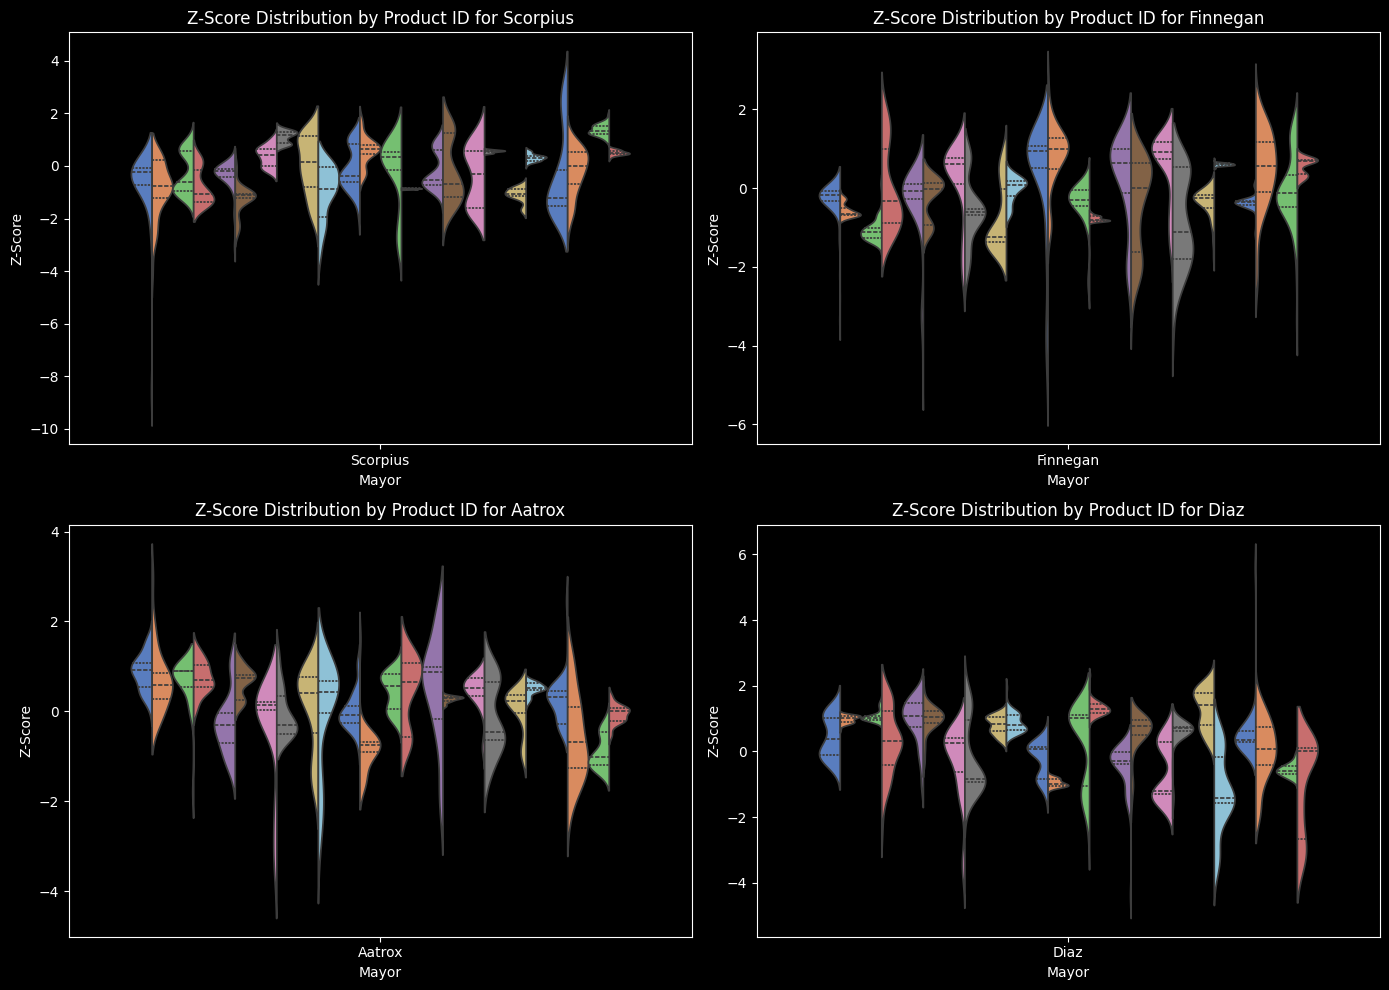

In [ ]:
# Create subplots (4 mayors in this case) Sadly, this graph is too small, reverting to manually plotting every mayor.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # Loop through as 1d instead of 2d

# List of mayors to create individual plots for each
mayors = sbDF["Mayor"].unique()

#We loop through every mayor, point to that axes and model it. It was cool until I saw the 4 legends 
for i, mayor in enumerate(mayors):
    ax = axes[i]
    mayor_data = sbDF[sbDF["Mayor"] == mayor]
    
    # Plot the violin plot for each mayor with Product ID as hue
    sns.violinplot(data=mayor_data, x="Mayor", y="Z-Score Price", hue="Product ID",inner="quart", ax=ax, split=True,  palette="muted", legend = False) #remove legends so it exists.
    ax.set_title(f"Z-Score Distribution by Product ID for {mayor}")
    ax.set_xlabel("Mayor")
    ax.set_ylabel("Z-Score")
    


# Adjust layout for better spacing
plt.tight_layout()
plt.show()